<a href="https://colab.research.google.com/github/limshaocong/analyticsEdge/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
library(tidyverse)
library(ggplot2)
library(lubridate)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [14]:
path = "https://raw.githubusercontent.com/limshaocong/analyticsEdge/main/Datasets/"

# Russell 3000 tickers
tickers.path = paste0(path,"r3000_tickers.csv")

# Quiver Quant data
twitter.follower.path = paste0(path, "QuiverQuant/twitter_follower.csv")
wiki.pageviews.path = paste0(path,"QuiverQuant/wikipedia_pageviews.csv")
wsb.sentiment.path = paste0(path,"QuiverQuant/wsb_sentiment.csv")
otc.path = paste0(path,"QuiverQuant/otc_2019.csv")

# RavenPack Sentiment Relevance data
rp.company.index.path = paste0(path,"RavenPack_WRDS/rp_company_index.csv")
## Dow Jones new releases (2018-2021)
rp.dj.2018.path = paste0(path,"RavenPack_WRDS/rp_dj_2018.csv")
rp.dj.2019.path = paste0(path,"RavenPack_WRDS/rp_dj_2019.csv")
rp.dj.2020.path = paste0(path,"RavenPack_WRDS/rp_dj_2020.csv")
rp.dj.2021.path = paste0(path,"RavenPack_WRDS/rp_dj_2021.csv")
## Global Press releases (2018-2021)
rp.pr.2018.path = paste0(path,"RavenPack_WRDS/rp_pr_2018.csv")
rp.pr.2019.path = paste0(path,"RavenPack_WRDS/rp_pr_2019.csv")
rp.pr.2020.path = paste0(path,"RavenPack_WRDS/rp_pr_2020.csv")
rp.pr.2021.path = paste0(path,"RavenPack_WRDS/rp_pr_2021.csv")

# CRSP Stock Price data
crsp.permnocode.path = paste0(path,"CRSP_WRDS/crsp_permno.csv")
crsp.price.2019.path = paste0(path,"CRSP_WRDS/crsp_daily_stock_price_2019.csv")
crsp.price.2020.path = paste0(path,"CRSP_WRDS/crsp_daily_stock_price_2020.csv")
crsp.price.2021.path = paste0(path,"CRSP_WRDS/crsp_daily_stock_price_2021.csv")

**Exploring RavenPack Data**


In [ ]:
# Import company index which allows the tickers to be mapped to RavenPack's
# internal entity index
rp.company.index = read.csv(rp.company.index.path)

# Read the 2021 Dow Jones sentiment data
rp.dj.2021 = read.csv(rp.dj.2021.path)

In [ ]:
length(unique(rp.dj.2021$rp_entity_id))
rp.dj.2021$rpna_date_utc1 <- mdy(rp.dj.2021$rpna_date_utc)
last = max(rp.dj.2021$rpna_date_utc)
last

[1] 2815

[1] "9/9/2021"

In [ ]:
# Sample of Data of AAPL for 2021 Dow Jones
#
# Conclusions:
#
# 1. Data is relatively spares, with no data on most dates. Preprocess to
# fill in non-entries.
#
# 2. There are several entries which share the same "category", "relevance",
# "ess" and "date". Preprocess to aggregate repetitions.
#
# 3. There are also several entries on the same "date" that have a range of 
# "ess". Need to determine means of aggregation.
#
# 3. Many entries that have neutral sentiment (ie. ess = 50). Preprocessing
# needs to assume if absence of press release and neutral announcement should
# encoded the same.

aapl.index = rp.company.index$rp_entity_id[rp.company.index$ticker == "AAPL"]
rp.dj.2021 %>% filter(rp.dj.2021$rp_entity_id == aapl.index) %>% head(20)

,rp_entity_id,category,relevance,ess,rpna_date_utc
,<chr>,<chr>,<int>,<int>,<chr>
1,D8442A,analyst-ratings-change-neutral,100,51,1/5/2021
2,D8442A,price-target-upgrade,100,91,1/5/2021
3,D8442A,executive-appointment,100,54,1/5/2021
4,D8442A,executive-appointment,100,54,1/5/2021
5,D8442A,executive-appointment,100,54,1/5/2021
6,D8442A,analyst-ratings-change-neutral,100,78,1/5/2021
7,D8442A,price-target-upgrade,100,75,1/5/2021
8,D8442A,executive-salary-increase,100,44,1/6/2021
9,D8442A,executive-salary-increase,100,44,1/6/2021


In [ ]:
# Relevance values are limited to 20 or 100
aggregate(rp_entity_id ~ relevance, data = rp.dj.2021, FUN = length)

relevance,rp_entity_id
<int>,<int>
20,41202
100,224702


In [ ]:
low.relevance = rp.dj.2021 %>% filter(rp.dj.2021$relevance == 20)
aggregate(relevance ~ rp_entity_id, data = low.relevance, FUN = length)

rp_entity_id,relevance
<chr>,<int>
0C136E,3
0E64D4,26
12A3A3,81
12F98C,1
139303,1102
1E1125,2918
3461CF,6038
3B37F7,185
442587,67


In [ ]:
prevelance = aggregate(relevance ~ rp_entity_id, data = rp.dj.2021, FUN = length)
head(prevelance[order(prevelance$relevance, decreasing = T), ], 20)

,rp_entity_id,relevance
,<chr>,<int>
2283,CFF97C,8740
1583,9196A2,7300
574,3461CF,6281
1982,B3CB74,5400
1051,619882,3213
310,1E1125,3149
963,58CA9A,2475
858,50070E,2077
2561,E8846E,2062


In [ ]:
rp.dj.2021 %>% filter(rp.dj.2021$rp_entity_id == "9196A2") %>% head(20)

,rp_entity_id,category,relevance,ess,rpna_date_utc
,<chr>,<chr>,<int>,<int>,<chr>
1,9196A2,analyst-ratings-change-positive,100,78,1/4/2021
2,9196A2,analyst-ratings-set-neutral-rater,20,50,1/4/2021
3,9196A2,price-target-set-rater,20,50,1/4/2021
4,9196A2,analyst-ratings-set-negative-rater,20,50,1/4/2021
5,9196A2,price-target-set-rater,20,50,1/4/2021
6,9196A2,analyst-ratings-change-neutral-rater,20,50,1/4/2021
7,9196A2,price-target-upgrade-rater,20,50,1/4/2021
8,9196A2,analyst-ratings-change-neutral-rater,20,50,1/4/2021
9,9196A2,price-target-upgrade-rater,20,50,1/4/2021


**Exploring Twitter Follower Data**

In [ ]:
twitter.follower = read.csv(twitter.follower.path)
twitter.follower$Date <- ymd(twitter.follower$Date)

In [ ]:
head(twitter.follower, 10)

,Date,Ticker,Followers,pct_change_day,pct_change_week,pct_change_month
,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2021-10-14,A,28378,0.000000000,0.08111444,0.4495416
2,2021-10-13,A,28378,0.014097413,0.06699813,0.4673228
3,2021-10-12,A,28374,0.003524477,0.09877937,0.4673890
4,2021-10-11,A,28373,0.010574551,0.11291062,0.4602910
5,2021-10-09,A,28370,0.014101389,0.10585745,0.4816887
6,2021-10-08,A,28366,0.021156558,0.10587239,0.4781977
7,2021-10-07,A,28360,0.017633574,0.09529524,0.4533862
8,2021-10-06,A,28355,-0.014104870,0.10591350,0.4605846
9,2021-10-05,A,28359,0.045861850,0.09883167,0.4676374


In [ ]:
first = min(twitter.follower$Date)
last = max(twitter.follower$Date)
last - first
paste(first, ",", last)
length(unique(twitter.follower$Ticker))

Time difference of 530 days

[1] "2020-05-02 , 2021-10-14"

[1] 1411

**Exploring r/wsb Data**

In [4]:
wsb.sentiment = read.csv(wsb.sentiment.path)
wsb.sentiment$Date <- ymd(wsb.sentiment$Date)

In [5]:
head(wsb.sentiment, 10)

,Date,Ticker,Mentions,Rank,Sentiment
,<date>,<chr>,<int>,<int>,<dbl>
1,2018-08-10,AA,1,53,-0.4019
2,2018-08-28,AA,1,60,0.2023
3,2018-09-07,AA,1,74,0.7184
4,2018-10-09,AA,1,84,-0.2732
5,2018-10-18,AA,1,90,-0.0516
6,2018-11-03,AA,2,36,-0.0772
7,2018-11-28,AA,1,119,-0.5267
8,2019-01-04,AA,1,144,-0.5859
9,2019-01-08,AA,1,105,0.2732


In [6]:
first = min(wsb.sentiment$Date)
last = max(wsb.sentiment$Date)
last - first
paste(first, ",", last)
length(unique(wsb.sentiment$Ticker))

Time difference of 1177 days

[1] "2018-08-01 , 2021-10-21"

[1] 1251

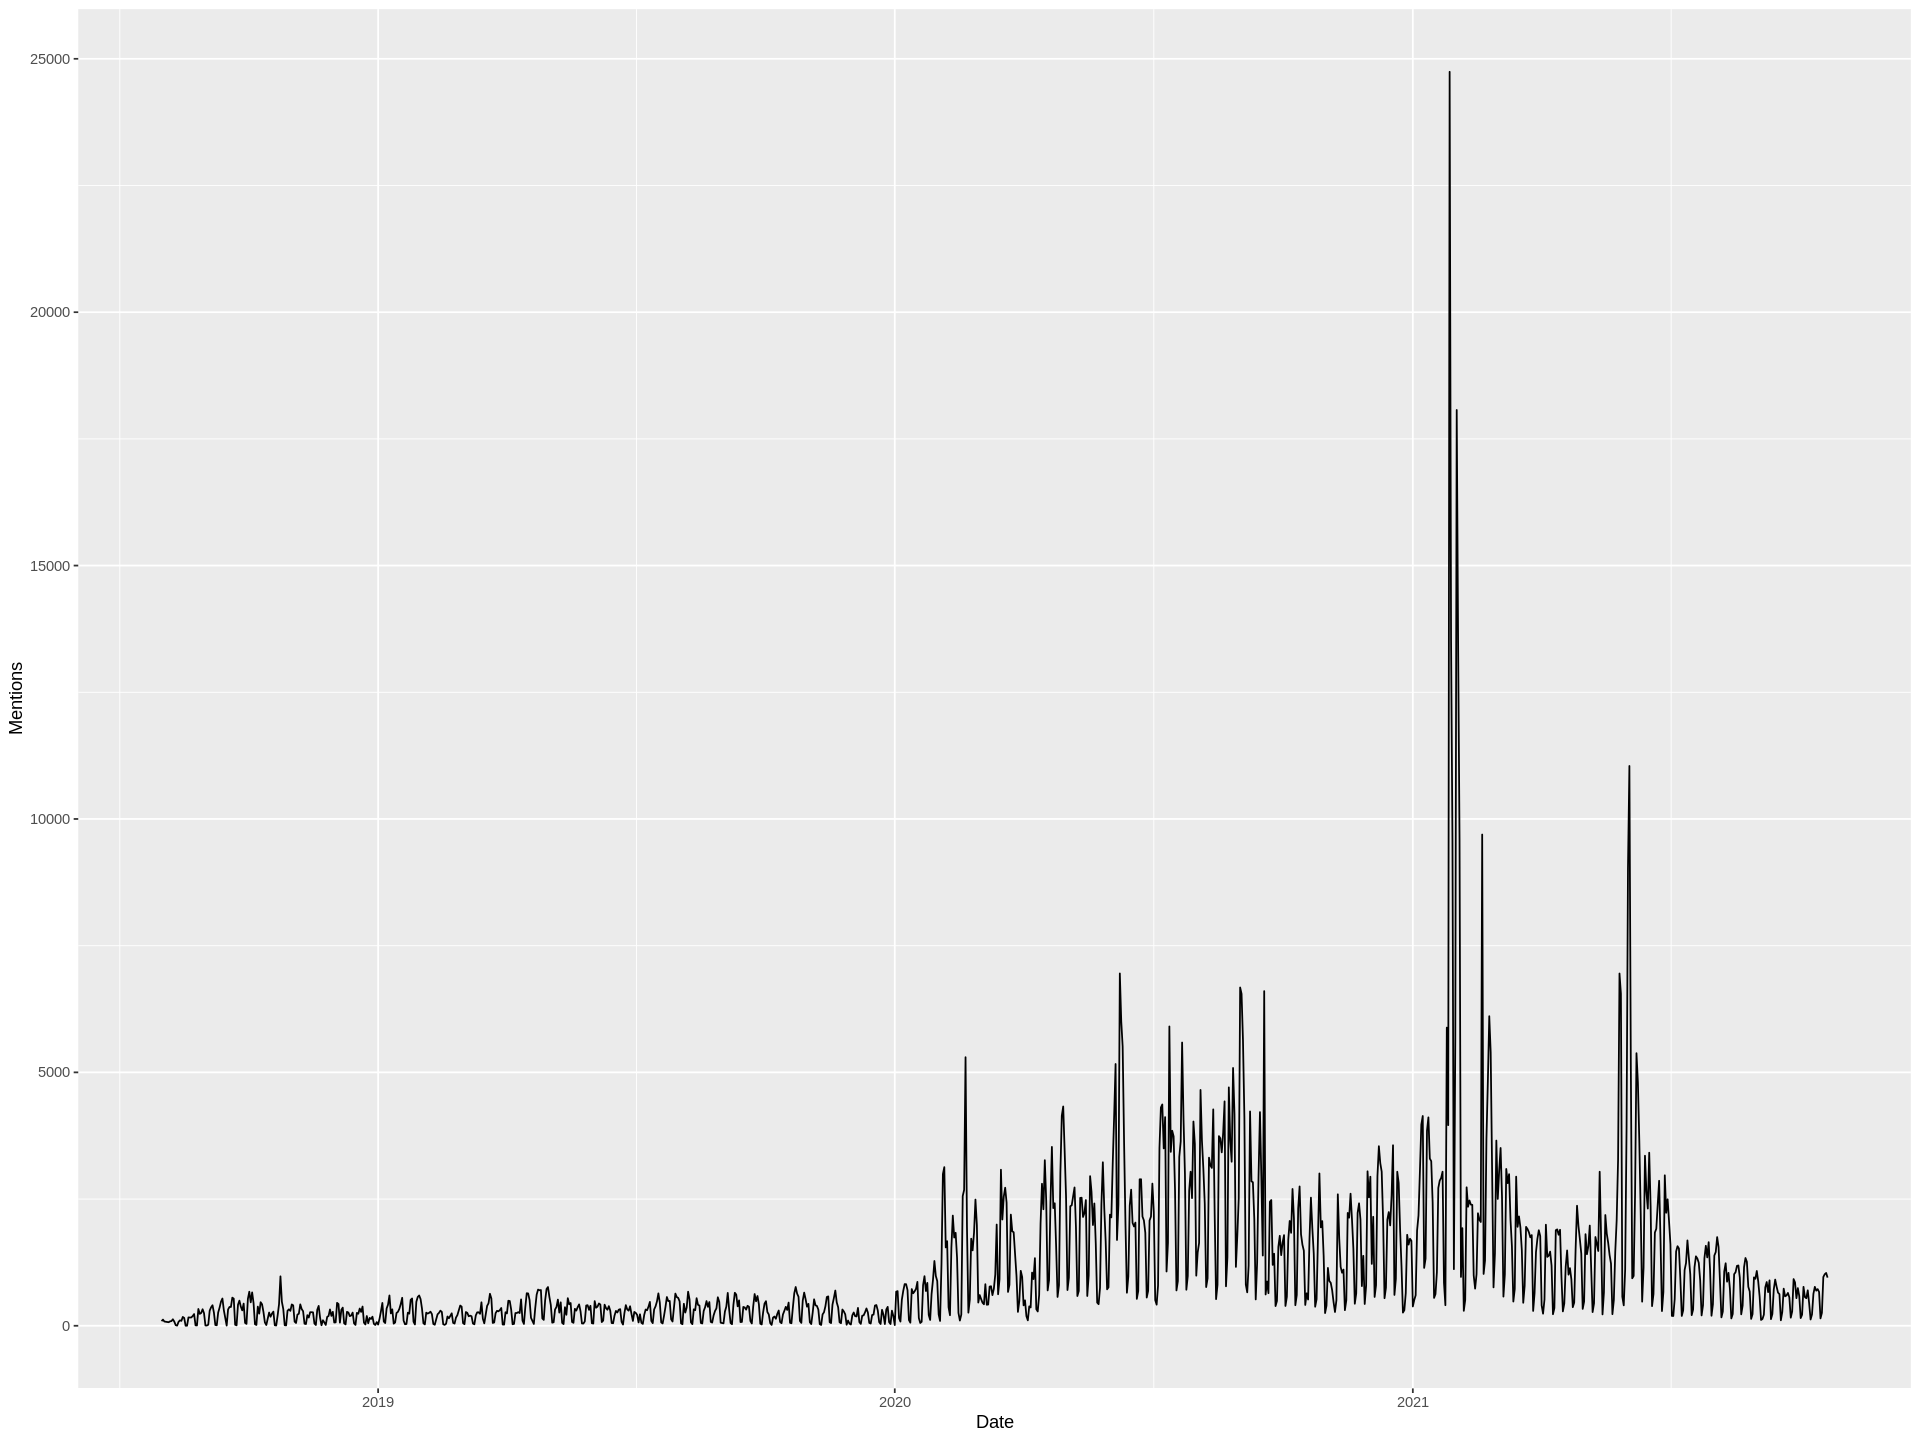

In [13]:
mentions.time <- aggregate(Mentions ~ Date, data = wsb.sentiment, FUN = sum)
options(repr.plot.width = 16, repr.plot.height = 12)
ggplot(mentions.time, aes(x = Date, y = Mentions)) + geom_line()

**Explore wikipedia pageviews**

In [ ]:
wiki.pageviews = read.csv(wiki.pageviews.path)
wiki.pageviews$Date <- ymd(wiki.pageviews$Date)

In [ ]:
head(wiki.pageviews, 10)

,Date,Ticker,Views,pct_change_week,pct_change_month
,<date>,<chr>,<dbl>,<dbl>,<dbl>
1,2016-10-17,A,66,-34.848485,-31.818182
2,2016-10-24,A,43,-34.848485,-31.818182
3,2016-10-31,A,52,20.930233,-31.818182
4,2016-11-07,A,47,-9.615385,-31.818182
5,2016-11-14,A,45,-4.255319,-31.818182
6,2016-11-21,A,44,-2.222222,2.325581
7,2016-11-28,A,36,-18.181818,-30.769231
8,2016-12-05,A,54,50.000000,14.893617
9,2016-12-12,A,55,1.851852,22.222222


In [ ]:
first = min(wiki.pageviews$Date)
last = max(wiki.pageviews$Date)
last - first
paste(first, ",", last)
length(unique(wiki.pageviews$Ticker))

Time difference of 1820 days

[1] "2016-10-17 , 2021-10-11"

[1] 954

**Explore OTC data**

In [ ]:
otc = read.csv(otc.path)
otc$Date <- ymd(otc$Date)

In [ ]:
first = min(otc$Date)
last = max(otc$Date)
last - first
paste(first, ",", last)
length(unique(otc$Ticker))

Time difference of 1023 days

[1] "2019-01-02 , 2021-10-21"

[1] 2734

**Stock Price History**

In [ ]:
crsp.permnocode = read.csv(crsp.permnocode.path)
crsp.price.2020 = read.csv(crsp.price.2020.path)

In [ ]:
crsp.price.2020$date <- dmy(crsp.price.2020$date)
head(crsp.price.2020, 5)

,PERMNO,date,CUSIP,BIDLO,ASKHI,PRC,VOL,BID,ASK,OPENPRC,NUMTRD
,<int>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,10026,2020-01-02,46603210,181.440,185.30,181.68,88291,181.67,181.70,185.30,2300
2,10026,2020-01-03,46603210,180.890,185.17,184.91,71463,184.90,184.91,180.89,1572
3,10026,2020-01-06,46603210,183.140,185.52,185.07,70308,184.77,185.07,184.18,1764
4,10026,2020-01-07,46603210,182.475,184.63,183.03,72267,182.90,183.22,184.40,2032
5,10026,2020-01-08,46603210,181.810,183.89,182.04,118592,182.04,182.23,182.73,2208
